<a href="https://colab.research.google.com/github/wassimtajeddin/MNIST-DeepLearning-TensorFlow/blob/main/TensorDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8591 - loss: 0.4872 - val_accuracy: 0.9584 - val_loss: 0.1365
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9563 - loss: 0.1530 - val_accuracy: 0.9715 - val_loss: 0.0930
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9683 - loss: 0.1072 - val_accuracy: 0.9732 - val_loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9729 - loss: 0.0888 - val_accuracy: 0.9745 - val_loss: 0.0808
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9769 - loss: 0.0758 - val_accuracy: 0.9764 - val_loss: 0.0786
313/313 - 1s - 2ms/step - accuracy: 0.9764 - loss: 0.0786

Test Accuracy: 0.9764000177383423
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


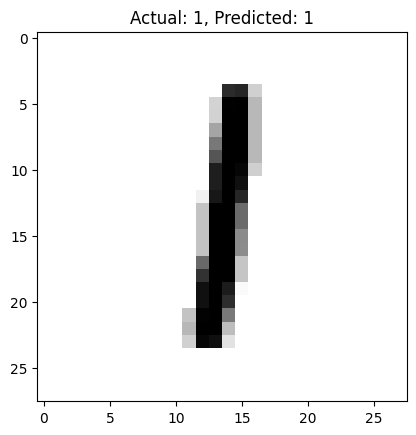

In [2]:
# Step 1. Import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Step 2. Load dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 3. Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 4. Create neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Helps prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6. Train model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Step 7. Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

# Step 8. Make prediction
predictions = model.predict(test_images)

# Select a random image for visualization
index = np.random.randint(0, len(test_images))
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.title(f"Actual: {test_labels[index]}, Predicted: {np.argmax(predictions[index])}")
plt.show()
